# Data visualisation notebook for NV collected data

A. Gentile

07/2017

In [2]:
import qinfer as qi
import numpy as np
import scipy as sp
from scipy import signal
import qutip as qt
import sys, os
import importlib as imp

In [3]:
import matplotlib.pyplot as plt

In [6]:
sys.path.append(os.path.join("..","Libraries","QML_lib"))
sys.path.append(os.path.join(".."))
import IOfuncts as mIO

In [7]:
imp.reload(mIO)

<module 'IOfuncts' from '..\\Libraries\\QML_lib\\IOfuncts.py'>

### First Hahn-peaks experimental data

Import experimental data ad libitum

In [285]:
directory = os.path.join("Cloud","Decoherence_learning","NV05_HahnEcho01")

counter = 0
Hahn_data = []
for root,dirs,files in os.walk(directory):
    for filename in files:  
        if filename.endswith(".csv"):
            newfilename = os.path.join(directory, filename)
            print(os.path.abspath(newfilename))
            #usecols only selects one normalisation 
            Hahn_data.append((np.loadtxt(os.path.abspath(newfilename), delimiter=",", usecols=(0,2), skiprows=1)).tolist())

C:\Users\ag15141\Local Documents\Cloud\Dropbox (Qsim)\Hamiltonian Learning With Seb\Decoherence_learning\NV05_HahnEcho01\fig4_01.csv
C:\Users\ag15141\Local Documents\Cloud\Dropbox (Qsim)\Hamiltonian Learning With Seb\Decoherence_learning\NV05_HahnEcho01\fig4_02.csv
C:\Users\ag15141\Local Documents\Cloud\Dropbox (Qsim)\Hamiltonian Learning With Seb\Decoherence_learning\NV05_HahnEcho01\fig4_03.csv
C:\Users\ag15141\Local Documents\Cloud\Dropbox (Qsim)\Hamiltonian Learning With Seb\Decoherence_learning\NV05_HahnEcho01\fig4_04.csv
C:\Users\ag15141\Local Documents\Cloud\Dropbox (Qsim)\Hamiltonian Learning With Seb\Decoherence_learning\NV05_HahnEcho01\fig4_05.csv
C:\Users\ag15141\Local Documents\Cloud\Dropbox (Qsim)\Hamiltonian Learning With Seb\Decoherence_learning\NV05_HahnEcho01\fig4_06.csv
C:\Users\ag15141\Local Documents\Cloud\Dropbox (Qsim)\Hamiltonian Learning With Seb\Decoherence_learning\NV05_HahnEcho01\fig4_07.csv
C:\Users\ag15141\Local Documents\Cloud\Dropbox (Qsim)\Hamiltonian Lea

In [286]:
Hahn_data = [item for sublist in Hahn_data for item in sublist]

In [287]:
Hahn_data = np.asarray(Hahn_data)
Hahn_data = Hahn_data[Hahn_data[:,0].argsort()]

In [288]:
Hahn_data.shape

(400, 2)

In [289]:
u, indices = np.unique(Hahn_data[:,0], return_index=True)
clean_Hahn_data = np.array([[Hahn_data[i, 0], Hahn_data[i, 1]] for i in indices])

Select a range of data to plot (makes the oscillatory behaviour more clear 
when datasets are intervalled by huge "gaps").
I have selected the first three oscillations as there are no "gaps" in between them as data collection, which makes it a bit easier to infer a possible fit

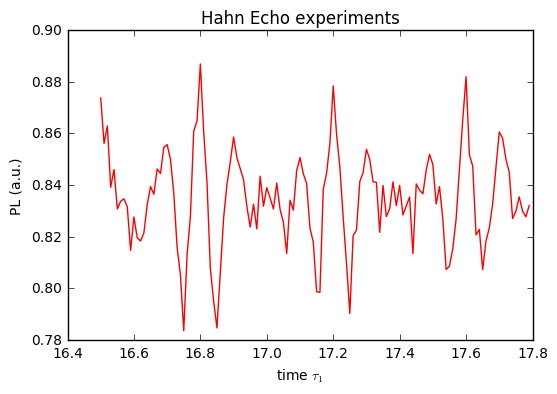

In [293]:
myrange = range(180, min(clean_Hahn_data.shape[0],400)) 
xdata = clean_Hahn_data[myrange,0]/1000 # converted to us
ydata = clean_Hahn_data[myrange,1]

plt.plot(xdata, ydata, "r-")
plt.title('Hahn Echo experiments')
plt.xlabel(r'time $\tau_1$')
plt.ylabel('PL (a.u.)')

plt.show()

### Refined Hahn-peaks experimental data

Import experimental data ad libitum

In [467]:
directory = os.path.join("..","..","..","Hamiltonian Learning With Seb","Decoherence_learning","NV05_HahnEcho02")

counter = 0
Hahn_data = []
for root,dirs,files in os.walk(directory):
    for filename in files:  
        if filename.endswith(".csv"):
            newfilename = os.path.join(directory, filename)
            print(os.path.abspath(newfilename))
            #usecols only selects one normalisation 
            Hahn_data.append((np.loadtxt(os.path.abspath(newfilename), delimiter=",", usecols=(0,2), skiprows=1)).tolist())

C:\Users\ag15141\Local Documents\Cloud\Dropbox (Qsim)\Hamiltonian Learning With Seb\Decoherence_learning\NV05_HahnEcho02\01.csv
C:\Users\ag15141\Local Documents\Cloud\Dropbox (Qsim)\Hamiltonian Learning With Seb\Decoherence_learning\NV05_HahnEcho02\02.csv
C:\Users\ag15141\Local Documents\Cloud\Dropbox (Qsim)\Hamiltonian Learning With Seb\Decoherence_learning\NV05_HahnEcho02\03.csv
C:\Users\ag15141\Local Documents\Cloud\Dropbox (Qsim)\Hamiltonian Learning With Seb\Decoherence_learning\NV05_HahnEcho02\04.csv
C:\Users\ag15141\Local Documents\Cloud\Dropbox (Qsim)\Hamiltonian Learning With Seb\Decoherence_learning\NV05_HahnEcho02\05.csv
C:\Users\ag15141\Local Documents\Cloud\Dropbox (Qsim)\Hamiltonian Learning With Seb\Decoherence_learning\NV05_HahnEcho02\06.csv
C:\Users\ag15141\Local Documents\Cloud\Dropbox (Qsim)\Hamiltonian Learning With Seb\Decoherence_learning\NV05_HahnEcho02\07.csv
C:\Users\ag15141\Local Documents\Cloud\Dropbox (Qsim)\Hamiltonian Learning With Seb\Decoherence_learning

In [468]:
Hahn_data = [item for sublist in Hahn_data for item in sublist]

In [469]:
Hahn_data = np.asarray(Hahn_data)
Hahn_data = Hahn_data[Hahn_data[:,0].argsort()]

In [470]:
Hahn_data.shape

(951, 2)

In [471]:
u, indices = np.unique(Hahn_data[:,0], return_index=True)
clean_Hahn_data = np.array([[Hahn_data[i, 0], Hahn_data[i, 1]] for i in indices])

Select a range of data to plot (makes the oscillatory behaviour more clear 
when datasets are intervalled by huge "gaps").
I have selected the first three oscillations as there are no "gaps" in between them as data collection, which makes it a bit easier to infer a possible fit

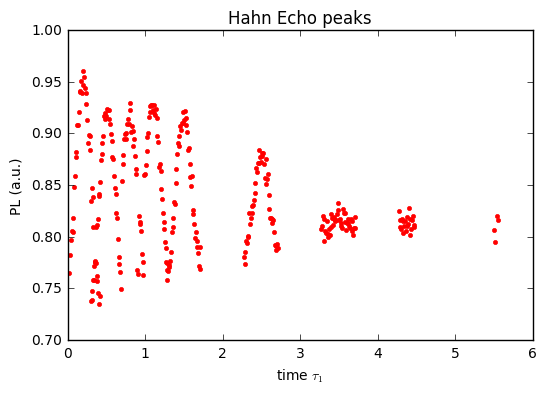

In [472]:
myrange = range(0, min(clean_Hahn_data.shape[0],300)) 
xdata = clean_Hahn_data[myrange,0]/1000 # converted to us
ydata = clean_Hahn_data[myrange,1]

plt.plot(xdata, ydata, "r.")
plt.title('Hahn Echo peaks')
plt.xlabel(r'time $\tau_1$')
plt.ylabel('PL (a.u.)')

plt.show()

### Hahn-echo peaks, envelope

Import experimental data ad libitum

In [387]:
directory = os.path.join("..","..","..","Hamiltonian Learning With Seb","Decoherence_learning","NV05_HahnEcho02_first_tauequtaudeg")

counter = 0
Hahn_data = []
for root,dirs,files in os.walk(directory):
    for filename in files:  
        if filename.endswith(".csv"):
            newfilename = os.path.join(directory, filename)
            print(os.path.abspath(newfilename))
            #usecols only selects one normalisation 
            Hahn_data.append((np.loadtxt(os.path.abspath(newfilename), delimiter=",", usecols=(0,1), skiprows=1)).tolist())

C:\Users\ag15141\Local Documents\Cloud\Dropbox (Qsim)\Hamiltonian Learning With Seb\Decoherence_learning\NV05_HahnEcho02_first_tauequtaudeg\analysis.csv


In [388]:
Hahn_data = [item for sublist in Hahn_data for item in sublist]

In [389]:
Hahn_data = np.asarray(Hahn_data)
Hahn_data = Hahn_data[Hahn_data[:,0].argsort()]

In [390]:
Hahn_data.shape

(99, 2)

In [399]:
u, indices = np.unique(Hahn_data[:,0], return_index=True)
clean_Hahn_data = np.array([[Hahn_data[i, 0], Hahn_data[i, 1]] for i in indices])

Select a range of data to plot (makes the oscillatory behaviour more clear 
when datasets are intervalled by huge "gaps").
I have selected the first three oscillations as there are no "gaps" in between them as data collection, which makes it a bit easier to infer a possible fit

In [400]:
myrange = range(0, min(clean_Hahn_data.shape[0],100)) 
xdata = clean_Hahn_data[myrange,0]/1000 # converted to us
ydata = clean_Hahn_data[myrange,1]

In [401]:
def func(t, offset, ratio, tc):
    return ratio * np.exp(- (t / tc)**4) +offset 

In [421]:
popt, pcov = sp.optimize.curve_fit(func, xdata, ydata, bounds=(0, [1., 1., 10.]))
print(r'Estimated tau_c from data-fit: ' + str(popt[2]) + ' us')

Estimated tau_c from data-fit: 2.71421861618 us


In [422]:
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit-with-bounds')

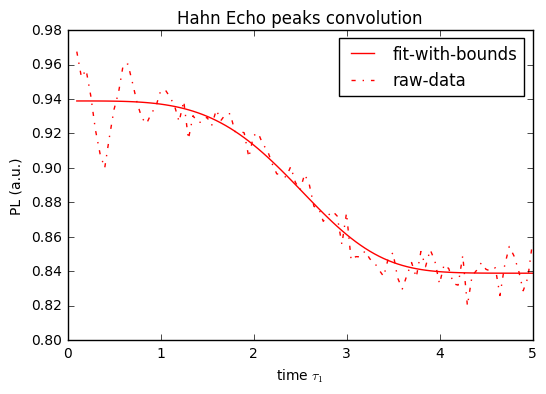

In [423]:
plt.plot(xdata, ydata, "r-.", label='raw-data')
plt.title('Hahn Echo peaks convolution')

plt.legend()

plt.xlabel(r'time $\tau_1$')
plt.ylabel('PL (a.u.)')

plt.show()

### Hahn-echo signal experimental data

Import experimental data ad libitum

In [8]:
directory = os.path.join("..","..","..","Hamiltonian Learning With Seb","Decoherence_learning","NV05_HahnEcho02_second_tauequtaudeg")

counter = 0
Hahn_data = []
for root,dirs,files in os.walk(directory):
    for filename in files:  
        if filename.endswith(".csv"):
            newfilename = os.path.join(directory, filename)
            print(os.path.abspath(newfilename))
            #usecols only selects one normalisation 
            Hahn_data.append((np.loadtxt(os.path.abspath(newfilename), delimiter=",", usecols=(0,1), skiprows=1)).tolist())

C:\Users\ag15141\Local Documents\Cloud\Dropbox (Qsim)\Hamiltonian Learning With Seb\Decoherence_learning\NV05_HahnEcho02_second_tauequtaudeg\analysis_01.csv
C:\Users\ag15141\Local Documents\Cloud\Dropbox (Qsim)\Hamiltonian Learning With Seb\Decoherence_learning\NV05_HahnEcho02_second_tauequtaudeg\analysis_02.csv


In [9]:
Hahn_data = [item for sublist in Hahn_data for item in sublist]

In [10]:
Hahn_data = np.asarray(Hahn_data)
Hahn_data = Hahn_data[Hahn_data[:,0].argsort()]

In [11]:
Hahn_data.shape

(99, 2)

In [12]:
u, indices = np.unique(Hahn_data[:,0], return_index=True)
clean_Hahn_data = np.array([[Hahn_data[i, 0], Hahn_data[i, 1]] for i in indices])

Select a range of data to plot (makes the oscillatory behaviour more clear 
when datasets are intervalled by huge "gaps").
I have selected the first three oscillations as there are no "gaps" in between them as data collection, which makes it a bit easier to infer a possible fit

In [13]:
myrange = range(0, min(clean_Hahn_data.shape[0],100)) 
xdata = clean_Hahn_data[myrange,0]/1000 # converted to us
ydata = clean_Hahn_data[myrange,1]

In [14]:
def func(t, offset, ratio, T2):
    return ratio * np.exp(- (2*t / T2)**3) +offset 

In [15]:
popt, pcov = sp.optimize.curve_fit(func, xdata, ydata, bounds=(0, [1., 1., 300.]))
perr = np.sqrt(np.diag(pcov))
print(r'Estimated T2 from data-fit: ' + str(popt[2]) + ' +/- ' + str(perr[2]) + ' us')

Estimated T2 from data-fit: 247.703575896 +/- 213.865616616 us


The huge st.dev. associated with T2 is probably due to heterodox fitting to whole dataset (instead of estimated peaks). 

E.g. in Lily's thesis $T_2 = 242 \pm 16 \mu$s 

In [16]:
plt.plot(xdata, func(xdata, *popt), 'g-', label='fit-with-bounds')

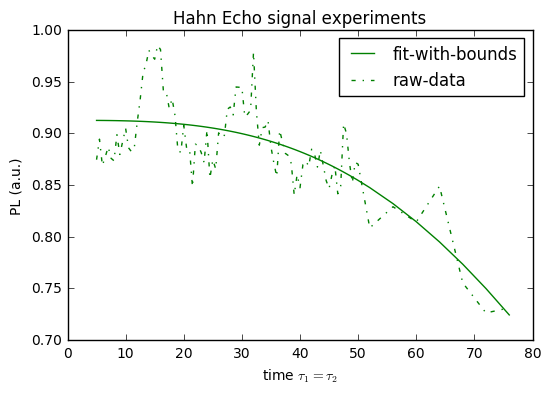

In [17]:
plt.plot(xdata, ydata, "g-.", label='raw-data')
plt.title('Hahn Echo signal experiments')

plt.legend()

plt.xlabel(r'time $\tau_1 = \tau_2$')
plt.ylabel('PL (a.u.)')

plt.show()

### Hahn-echo signal experimental data - latest data

Import experimental data ad libitum

In [30]:
directory = os.path.join("..","..","..","Hamiltonian Learning With Seb","Decoherence_learning","NV05_HahnEcho01_highres")

counter = 0
Hahn_data = []
for root,dirs,files in os.walk(directory):
    for filename in files:  
        if filename.endswith(".csv") and filename.startswith("ana"):
            newfilename = os.path.join(directory, filename)
            print(os.path.abspath(newfilename))
            #usecols only selects one normalisation
            if filename.endswith("s.csv"):
                Hahn_data.append((np.loadtxt(os.path.abspath(newfilename), delimiter=",", usecols=(0,1), skiprows=1)).tolist())
            else:
                temp = (np.loadtxt(os.path.abspath(newfilename), delimiter=",", usecols=(0,1), skiprows=1) )
                rescale = (mIO.rescaledatatomin(temp[:,1], newrange = [0.8, 0.84]))
                temp = [  [temp[i,0], rescale[i]] for i in range(len(temp)) ]
                Hahn_data.append(temp[10:-5])

C:\Users\ag15141\Local Documents\Cloud\Dropbox (Qsim)\Hamiltonian Learning With Seb\Decoherence_learning\NV05_HahnEcho01_highres\analysis.csv
C:\Users\ag15141\Local Documents\Cloud\Dropbox (Qsim)\Hamiltonian Learning With Seb\Decoherence_learning\NV05_HahnEcho01_highres\analysis_02.csv


In [31]:
Hahn_data = [item for sublist in Hahn_data for item in sublist]

In [32]:
Hahn_data = np.asarray(Hahn_data)
Hahn_data = Hahn_data[Hahn_data[:,0].argsort()]

In [33]:
Hahn_data.shape

(438, 2)

In [34]:
u, indices = np.unique(Hahn_data[:,0], return_index=True)
clean_Hahn_data = np.array([[Hahn_data[i, 0], Hahn_data[i, 1]] for i in indices])

Select a range of data to plot (makes the oscillatory behaviour more clear 
when datasets are intervalled by huge "gaps").
I have selected the first three oscillations as there are no "gaps" in between them as data collection, which makes it a bit easier to infer a possible fit

In [35]:
myrange = range(0, min(clean_Hahn_data.shape[0],440)) 
xdata = clean_Hahn_data[myrange,0]/1000 # converted to us
ydata = clean_Hahn_data[myrange,1]

In [112]:
peakind = signal.find_peaks_cwt(ydata, np.arange(14,30))
# peakind[1] -=1
peakind[2] +=7
# peakind[3] +=10
# peakind[4] +=3
[xdata[peakind][1:], ydata[peakind][1:]]

[array([ 14.5,  29.4,  42.8,  60.5]),
 array([ 0.96182203,  0.92246824,  0.85357996,  0.8188472 ])]

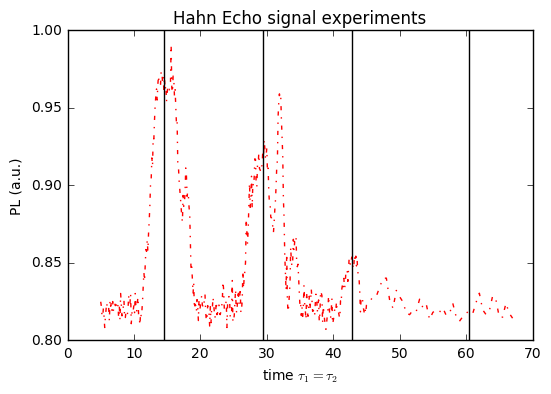

In [113]:
plt.plot(xdata, ydata, "r-.", label='raw-data')

for xc in xdata[peakind][1:]:
    plt.axvline(x=xc, ls = '-', color = 'black')

plt.title('Hahn Echo signal experiments')

plt.xlabel(r'time $\tau_1 = \tau_2$')
plt.ylabel('PL (a.u.)')

plt.show()

In [114]:
def func(t, offset, ratio, T2):
    return ratio * np.exp(- (2*t / T2)**3) +offset 

In [115]:
popt, pcov = sp.optimize.curve_fit(func, xdata, ydata, bounds=(0, [1., 1., 300.]))
perr = np.sqrt(np.diag(pcov))
print(r'Estimated T2 from data-fit: ' + str(popt[2]) + ' +/- ' + str(perr[2]) + ' us')

Estimated T2 from data-fit: 99.7134781168 +/- 20.2192234084 us


In [116]:
[xdata[peakind][1:], ydata[peakind][1:]]

[array([ 14.5,  29.4,  42.8,  60.5]),
 array([ 0.96182203,  0.92246824,  0.85357996,  0.8188472 ])]

In [117]:
popt2, pcov2 = sp.optimize.curve_fit(func, xdata[peakind][1:], ydata[peakind][1:], bounds=(0, [1., 1., 300.]))
perr2 = np.sqrt(np.diag(pcov2))
print(r'Estimated T2 from peaks-fit: ' + str(popt2[2]) + ' +/- ' + str(perr2[2]) + ' us')

Estimated T2 from peaks-fit: 78.7076270067 +/- 4.35212999193 us


The huge st.dev. associated with T2 is probably due to heterodox fitting to whole dataset (instead of estimated peaks). 

E.g. in Lily's thesis $T_2 = 242 \pm 16 \mu$s 

In [118]:
[popt, popt2]

[array([  8.05579177e-01,   6.00425839e-02,   9.97134781e+01]),
 array([  0.81348852,   0.15826945,  78.70762701])]

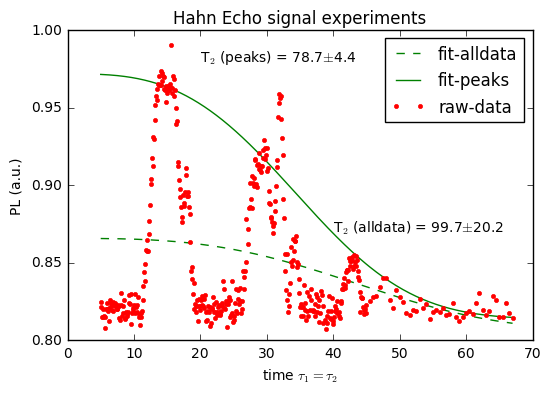

In [120]:
plt.plot(xdata, func(xdata, *popt), 'g--', label='fit-alldata')
plt.plot(xdata, func(xdata, *popt2), 'g-', label='fit-peaks')

plt.text(20, 0.98, 'T$_2$ (peaks) = ' + str(np.around(popt2[2],1)) + '$\pm$' + str(np.around(perr2[2],1)) )
plt.text(40, 0.87, 'T$_2$ (alldata) = ' + str(np.around(popt[2],1)) + '$\pm$' + str(np.around(perr[2],1)) )

plt.plot(xdata, ydata, "r.", label='raw-data')
plt.title('Hahn Echo signal experiments')

plt.legend()

plt.xlabel(r'time $\tau_1 = \tau_2$')
plt.ylabel('PL (a.u.)')

plt.show()